# Part I - FORD GOBIKE DATA EXPLORATION
## by Jarvis Betty Katana


## Introduction
This document explores a dataset at which includes information about individual rides made in a bike-sharing system called ford gobike. Ford Gobike covers the greater San Francisco Bay area.
  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Gathering and Assesing Data

In [2]:
df = pd.read_csv('./data/201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [5]:
# Checking for duplicated values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#checking for duplicates
sum(df.duplicated())

0

### Assessing Summary
* There are no duplicate values 
* A lot of datatypes needs to be changed
* start_time and end_time needs to be splitted into duration in minute,day,month

## Data Cleaning

In [7]:
#making copy of the data
clean_df= df.copy()
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Changing the datatypes of the columns

In [8]:
# Change end_time and start_time to datetime format
clean_df['start_time'] = pd.to_datetime(clean_df['start_time'])
clean_df['end_time'] = pd.to_datetime(clean_df['end_time'])
# Change user_type data type to categorical 
clean_df['user_type']= clean_df['user_type'].astype('category')
# Change the bike_id & station_id columns to strings a
clean_df['start_station_id'] = clean_df['start_station_id'].astype('str')
clean_df['end_station_id'] = clean_df['end_station_id'].astype('str')
clean_df['bike_id'] = clean_df['bike_id'].astype('str')

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### Create new columns for days of week,month,hour

In [10]:
# Splitting the start_time into hour,day,date,month
clean_df['start_hour'] = clean_df.start_time.dt.strftime('%H')
clean_df['start_day'] = clean_df.start_time.dt.strftime('%A')
clean_df['start_date'] = clean_df.start_time.dt.strftime('%Y-%m-%d')
clean_df['start_month'] = clean_df.start_time.dt.strftime('%B')

# Creating a duration_minutes column
clean_df['duration_min']=clean_df['duration_sec']/60


In [11]:
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_date,start_month,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,17,Thursday,2019-02-28,February,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,18,Thursday,2019-02-28,February,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,12,Thursday,2019-02-28,February,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,17,Thursday,2019-02-28,February,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,23,Thursday,2019-02-28,February,26.416667


In [12]:
# Exporting clean copy
clean_df.to_csv("./data/clean_fordgobike_tripdata.csv.csv", index=False)

### What is the structure of your dataset?

> The data structure captures bike-sharing trip information, including trip duration, start and end times, stations, user demographics, and membership status.

> Columns:
> * `duration_sec`: The duration of the bike trip is in seconds.
> * `start_time` and `end_time`: Date and time when the trip started and ended.
> * `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`: Information about the starting station.
> * `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`: Information about the ending station.
> * `bike_id`: The unique ID of the bike.
> * `user_type`: Whether the user is a "Customer" or "Subscriber".
> * `member_birth_year`: Year of birth of the member.
> * `member_gender`: Gender of the user.
> * `bike_share_for_all_trip`: Indicates if the trip is part of a bike-share-for-all program.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my dataset is the duration time(`duration_min`) Key areas of investigation include:
> * Whether rider type (Subscriber vs. Customer) affects trip duration.
> * The impact of day, month, and hour on both trip durations and the volume of rides.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To support the investigation into trip durations, the following features are crucial:
> * Start and End Time: Allows analysis of trip patterns across different times of day.
> * Start and End Stations: Useful for understanding popular routes or station-based influences on trip durations.
> * User Type: This can help differentiate behaviors between casual users (Customers) and more frequent riders (Subscribers).
> * Bike Share for All Trip: Could provide insights into whether this program correlates with different trip durations or behaviors.

## Univariate Exploration
> Assumptions:
> * The data is representative of the overall bike-sharing usage.
> * There are no significant data quality issues

#### 1. Distribution of Trip Duration (`duration_min`)
> What is the distribution of trip durations in the dataset?

Text(0, 0.5, 'Frequency')

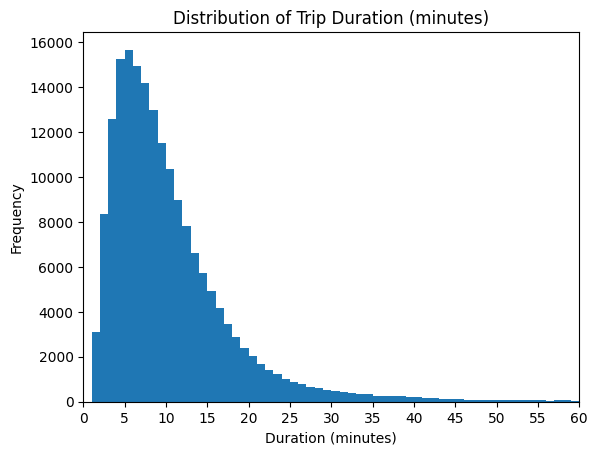

In [13]:
# Plotting distribution of trip duration
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=clean_df, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlim(0, 60)  # Focus on trips up to 60 minutes
plt.title("Distribution of Trip Duration (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

* Most trips are between 5 -15 minutes.
* Most trips are relatively short, with a few longer trips. 

In [14]:
#removing outliers from the time (duration_min)
clean_df = clean_df.query('duration_min <= 66')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181899 entries, 4 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             181899 non-null  int64         
 1   start_time               181899 non-null  datetime64[ns]
 2   end_time                 181899 non-null  datetime64[ns]
 3   start_station_id         181899 non-null  object        
 4   start_station_name       181704 non-null  object        
 5   start_station_latitude   181899 non-null  float64       
 6   start_station_longitude  181899 non-null  float64       
 7   end_station_id           181899 non-null  object        
 8   end_station_name         181704 non-null  object        
 9   end_station_latitude     181899 non-null  float64       
 10  end_station_longitude    181899 non-null  float64       
 11  bike_id                  181899 non-null  object        
 12  user_type            

#### 2. Distribution of User_Types(`user_type`)
> What is the distribution of user types in the dataset?

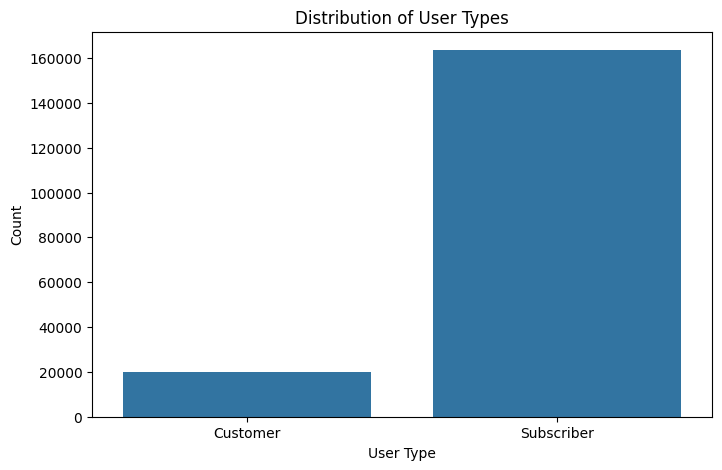

In [15]:
# Plotting distribution of user types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='user_type')
plt.title("Distribution of User Types")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.show()

* There are more riders subscribered as compared to customers
* Subscribers are the primary users of the bike-sharing system, with Customers constituting a smaller segment of the user base.

#### 3. Distribution of Rides by Day of the Week (`start_day`)
> How are bike-sharing trips distributed across different days of the week?

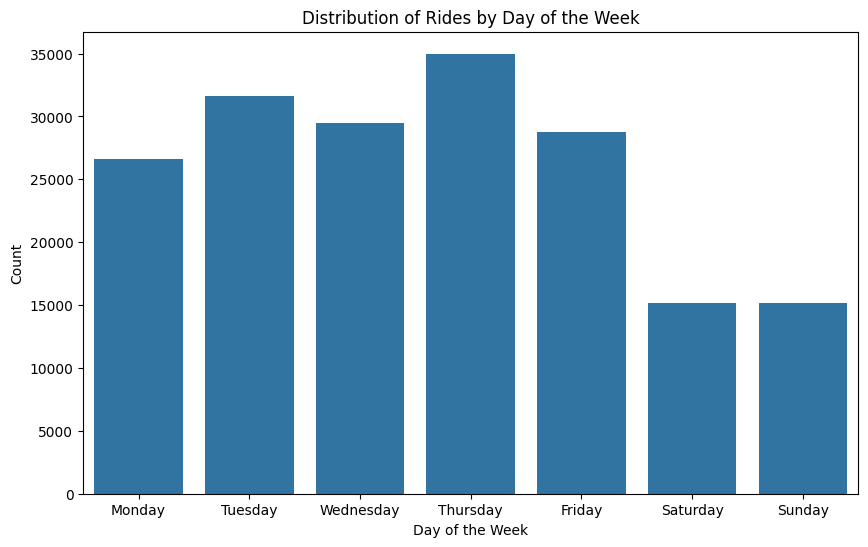

In [16]:
# Plotting distribution of rides by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='start_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Distribution of Rides by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

* The frequency of rides is higher during the weekdays than during the weekends
* Monday has the lowest rides in the week days
* The bar chart shows a clear peak in usage on Thursday, followed by Tuesday and Friday.

#### 4. Distribution of Start Hours (`hour`)
> How are bike-sharing trips distributed across different hours of the day?

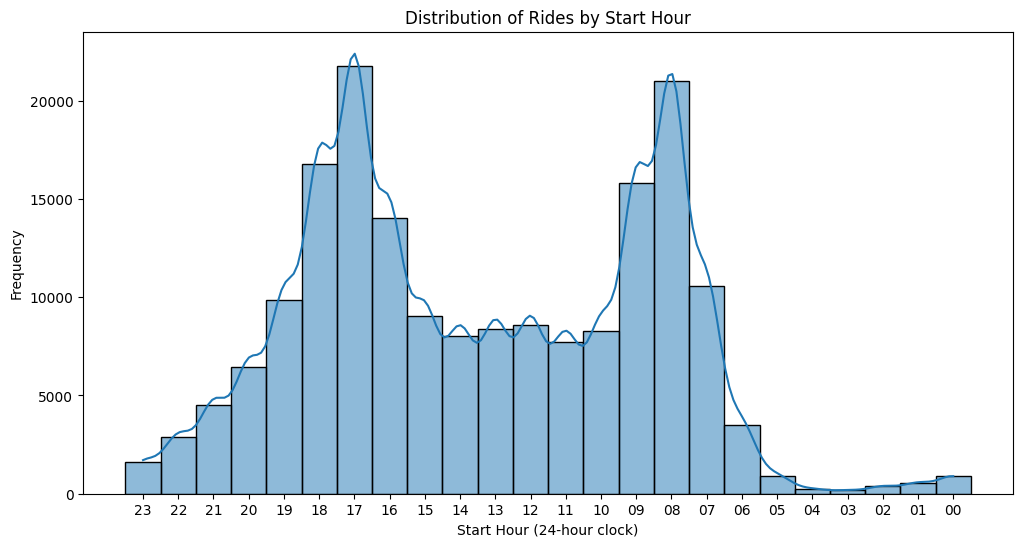

In [17]:
# Plotting distribution of rides by start hour
plt.figure(figsize=(12, 6))
sns.histplot(clean_df['start_hour'], bins=24, kde=True)
plt.title("Distribution of Rides by Start Hour")
plt.xlabel("Start Hour (24-hour clock)")
plt.ylabel("Frequency")
plt.show()


* The peak hours are 8 am and 5 pm
* Usage drops significantly during the night hours (around 12 AM to 5 AM)
* The overall pattern suggests a consistent daily cycle, with higher usage during peak hours and lower usage during off-peak hours.

#### 5. Distribution of Gender (member_gender)
> What is the distribution of member genders in the bike-sharing system?

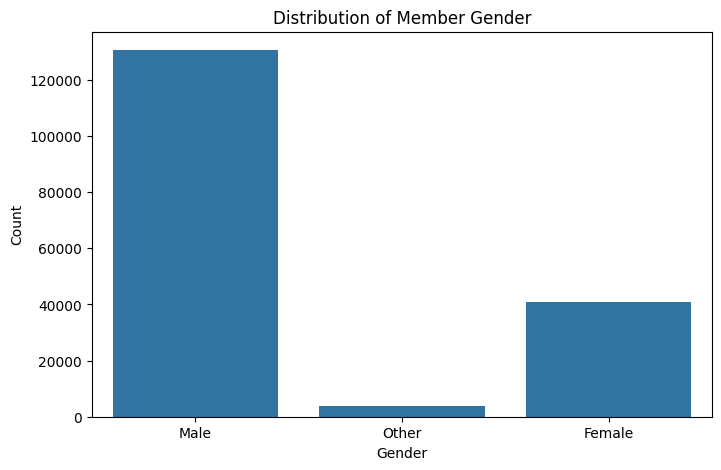

In [18]:
# Plotting distribution of member gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='member_gender')
plt.title("Distribution of Member Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


* The bar chart clearly shows that the majority of bike-sharing users are Male.
* Female users constitute a significant portion of the user base, while the "Other" category represents a relatively small number of users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Trip Duration (`duration_min`): The distribution is right-skewed, with most trips lasting between 5 to 10 minutes. However, some unusually long trips stand out as outliers. These outliers might represent anomalies or special cases where bikes were used for extended periods, possibly due to technical issues, long-distance trips, or improper returns. To get a clearer view of the data, we limited the histogram to display trips up to 60 minutes.

* User Types (`user_type`): The user distribution shows that Subscribers dominate compared to Customers. This is expected in bike-share programs where regular users, likely commuters, form the bulk of users.

* Day of the Week (`start_day`): The distribution indicates a higher number of trips on weekdays (Monday through Friday), with noticeable peaks around 8-9 AM and 5-6 PM. This pattern aligns with commuter usage, with fewer trips on weekends, suggesting that the service is popular among daily commuters.

* Start Hour (`start_hour`): We observed two main peaks in usage corresponding to typical commuting hours (8-9 AM and 5-6 PM), supporting the idea that bike-share usage is tied to work commute times. Outside of these times, there’s a fairly even distribution, with lower trip counts overnight.

* Gender (`member_gender`): There is a gender imbalance, with more male riders than female. This pattern might indicate a higher adoption rate among male users or other demographic factors influencing usage rates.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
* Outliers in Duration: Due to extreme trip durations, we applied a 60-minute limit on the x-axis for the duration plot to make the main distribution more interpretable. Trips exceeding 60 minutes were examined as potential outliers and might need additional filtering for certain analyses.

* Time Features (Day and Hour): For better interpretability, we transformed the date and time into distinct columns, such as day of the week and start hour. These transformations allowed us to identify daily and hourly patterns more effectively and compare across the week and times of day.

## Bivariate Exploration
> Assumptions:
> * There is a relationship between user type and trip duration.
> * There is a relationship between time of day and trip duration.
> * There is a relationship between day of the week and trip duration.

#### 1. Relationship Between Trip Duration (`duration_min`) and Start Hour (`start_hour`)
> Does trip duration vary by start hour?

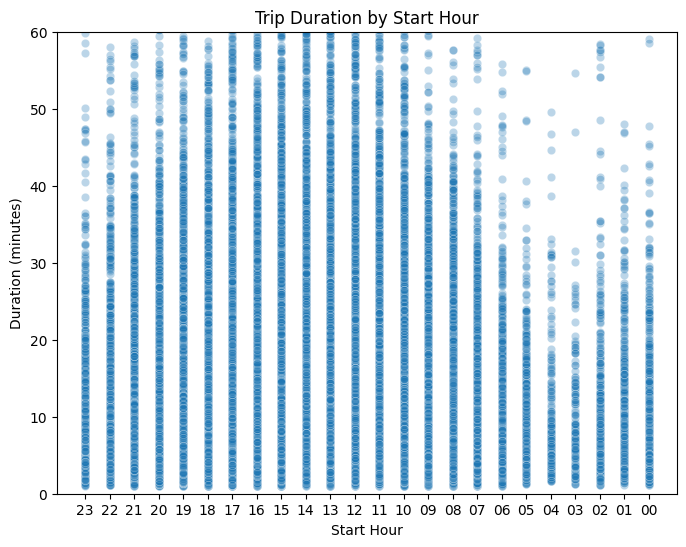

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_df, x='start_hour', y='duration_min', alpha=0.3)
plt.ylim(0, 60)  # Limiting y-axis to 60 minutes for focus on typical trip durations
plt.title("Trip Duration by Start Hour")
plt.xlabel("Start Hour")
plt.ylabel("Duration (minutes)")
plt.show()

* The scatter plot shows the relationship between trip duration and start hour. Each dot represents a trip, with the x-axis showing the start hour and the y-axis showing the trip duration.
* The plot shows that trip duration varies by start hour, there appears to be no strong time-of-day correlation with the length of the trip. Short and long trips are relatively evenly distributed across all hours where there are trips.
* The highest density of trips occurs during traditional commuting hours (morning around 8-9 AM and evening around 5-6 PM), suggesting that many users rely on the bike-sharing service for commuting purposes.

#### 2. Trip Duration by User Type (`user_type`)
> How does the distribution of trip duration differ between customer and subscriber user types?

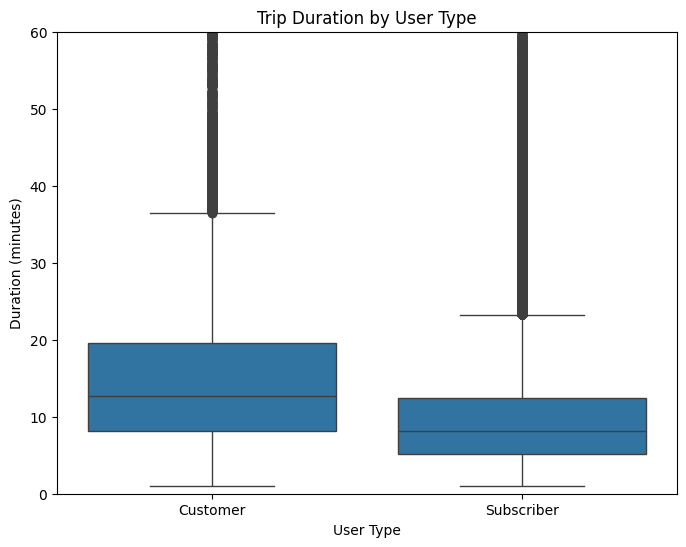

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x='user_type', y='duration_min')
plt.ylim(0, 60)  # Focus on trips up to 60 minutes for clear visualization
plt.title("Trip Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Duration (minutes)")
plt.show()


* This box plot shows the distribution of trip durations (in minutes) for two user types: Customer and Subscriber. The y-axis represents trip duration, while each box plot represents the central tendency and spread of trip durations for each user type.
* Subscribers exhibit shorter and more consistent trip durations, often below 15 minutes, likely indicative of regular commuting or short errands. In contrast, Customers tend to have longer and more variable trip durations, with a significant number of trips exceeding 20 minutes.
* Both groups have outliers, representing trips that are significantly longer than the typical trip duration

#### 3. Number of Rides by Day of the Week and User Type
> How does the number of  rides vary by day of the week for different user types (Customers vs. Subscribers)?

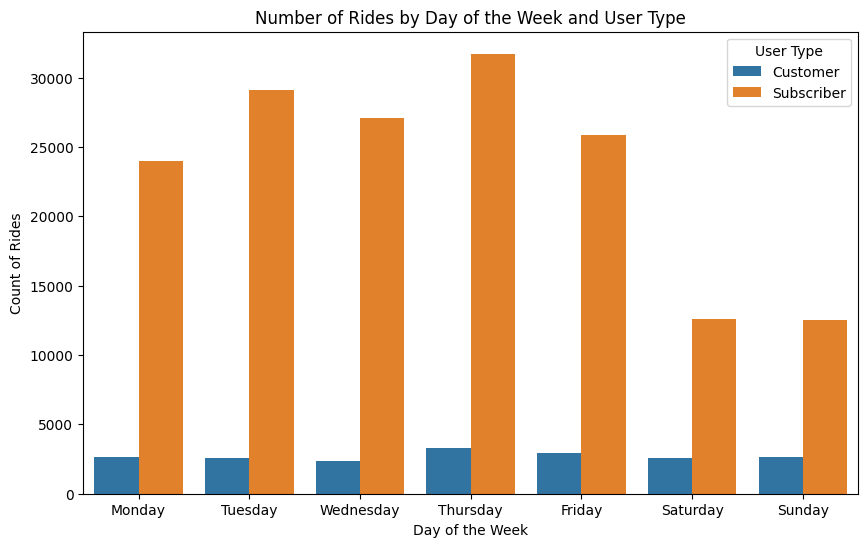

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_df, x='start_day', hue='user_type', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Number of Rides by Day of the Week and User Type")
plt.xlabel("Day of the Week")
plt.ylabel("Count of Rides")
plt.legend(title="User Type")
plt.show()


* Subscribers consistently have a higher number of rides than Customers on all days of the week.
* Both types of users exhibit a significant drop in usage on weekends, particularly on Saturday and Sunday.
* Both Customer and Subscriber usage is highest on Thursday, followed by Friday.
* Customer rides increase on weekends

#### 4. Heatmap of Trip Duration by Hour and Day of the Week
> How does the average trip duration vary by the hour of the day and the day of the week?

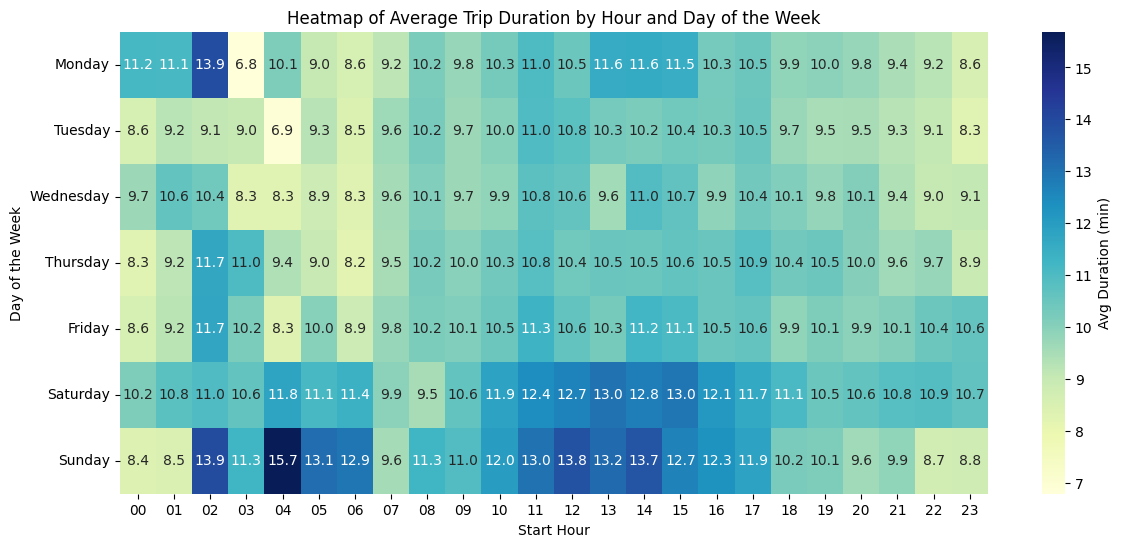

In [22]:
# Pivot table to calculate average duration by start hour and day
duration_pivot = clean_df.pivot_table(index='start_day', columns='start_hour', values='duration_min', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 6))
sns.heatmap(duration_pivot, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Avg Duration (min)'})
plt.title("Heatmap of Average Trip Duration by Hour and Day of the Week")
plt.xlabel("Start Hour")
plt.ylabel("Day of the Week")
plt.show()


* Trip durations are generally shorter in the early morning hours (around 00:00 to 05:00).
* Trip durations tend to increase in the morning peak hours (around 07:00 to 09:00).
* Trip durations increase again in the evening peak hours (around 17:00 to 19:00).
* Trip durations decrease in the afternoon hours (around 12:00 to 15:00).
* Trip durations decrease in the late night hours (around 21:00 to 23:00), with shorter trips or fewer trips overall.
* Saturday mornings show the highest average trip duration, suggesting that many users might be taking longer recreational rides on weekends.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> * User Type and Trip Duration:Customers tend  to have longer, more variable trip durations, often associated with recreational or leisure rides.while Subscribers typically have shorter, more consistent trip durations, suggesting frequent, likely commuting-related usage.
> * Day of Week and Trip Duration: Weekdays show distinct morning and evening peaks in trip duration, aligned with typical commuting patterns while the weekends exhibit a more relaxed pattern, with longer trip durations in the morning and afternoon, possibly indicating leisure activities or longer recreational rides.
> * Hour of the Day and Trip Duration: Early Morning and Late Night have shorter trip durations, likely due to fewer active users or shorter trips for early morning commutes or late-night returns while Morning and Evening Peaks have Longer trip durations, associated with commuting to and from work or school.
> * Afternoon Dip: Shorter trip durations, possibly reflecting lunch breaks or fewer trips during this time.
> * User Type and Day of the Week: Subscribers have consistent usage throughout the week, with higher usage on weekdays, suggesting regular commuting patterns while Customers have more variable usage, with lower usage on weekends, indicating a more leisure-oriented or occasional use.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> * User Type and Day of Week: Subscribers’ usage dropped noticeably on weekends, while Customers’ usage remained more constant throughout the week, indicating that Subscribers primarily use the service for commuting, while Customers use it for a mix of purposes.
> * Gender Distribution:While not the main focus, there was a gender imbalance in the dataset, with a larger proportion of male riders. This may suggest that bike-sharing services might appeal more to certain demographics or reflect broader patterns in transportation preferences.

## Multivariate Exploration
> Assumptions:
> * There is an interaction between user type and time of day on trip duration.
> * There is an interaction between user type and day of the week on trip duration.

#### 1. Facet Plot of Trip Duration by Hour, Split by User Type and Gender
> How does trip duration vary by hour of the day, user type, and gender?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


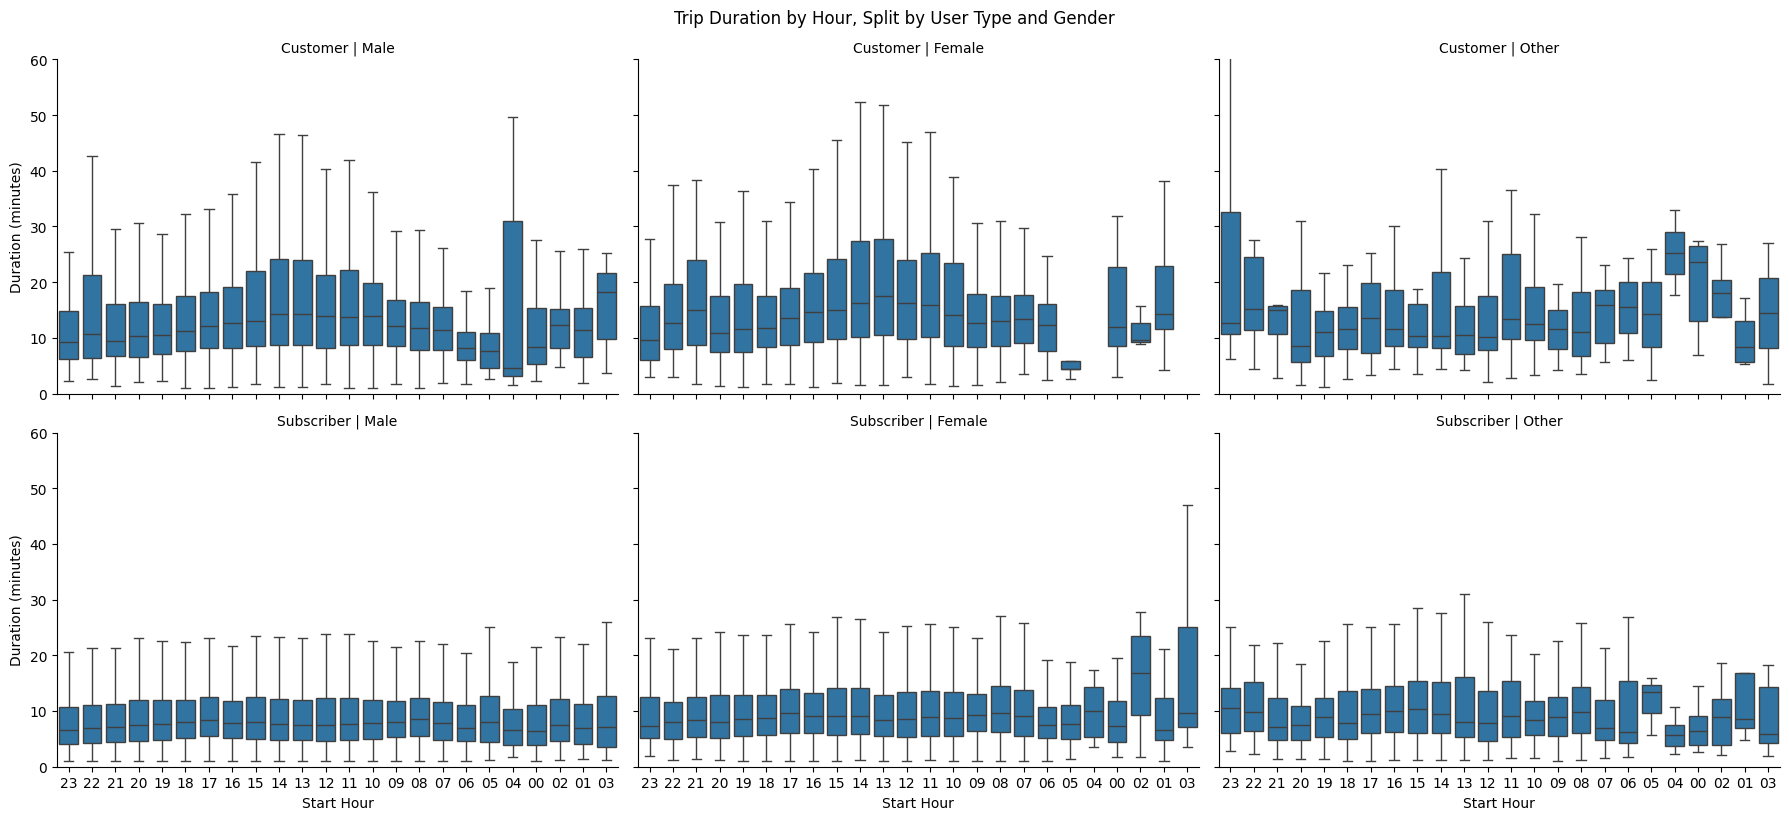

In [23]:
g = sns.FacetGrid(clean_df, row="user_type", col="member_gender", height=4, aspect=1.5)
g.map(sns.boxplot, "start_hour", "duration_min", showfliers=False)
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_axis_labels("Start Hour", "Duration (minutes)")
g.set(ylim=(0, 60))  # Focus on trips under 60 minutes for clarity
g.fig.suptitle("Trip Duration by Hour, Split by User Type and Gender", y=1.02)
plt.show()



The facet plot provides a granular view of how trip duration is influenced by time of day, user type, and gender.
* *Time of Day:* Trip durations exhibit distinct patterns throughout the day, with peak usage and longer trips during morning and evening commute hours. Off-peak hours, especially late nights and early mornings, tend to have shorter trip durations.
* *User Type:* Subscribers generally have shorter and more consistent trip durations, suggesting frequent, likely commuting-related usage. Customers, on the other hand, exhibit a wider range of trip durations, indicating a mix of commuting and leisure activities.
* *Gender:* While gender differences in trip duration are not as pronounced as user type, there are subtle variations. For instance, Customer males tend to have longer trips, especially during peak hours, compared to Customer females. Subscriber females, on the other hand, consistently have shorter trip durations.

#### 2. Scatter Plot Matrix of Start Hour, Trip Duration, and Day of the Week, Colored by User Type
> How are the start hour and trip duration related, and how does this relationship differ between Customer and Subscriber user types?

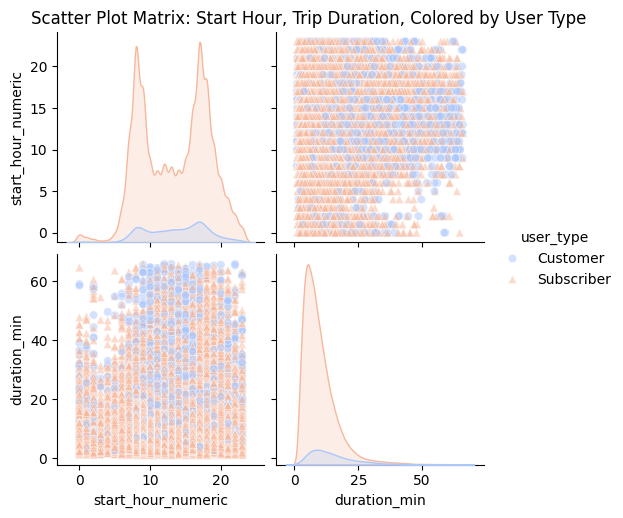

In [24]:
# Convert 'start_hour' to numeric for plotting purposes
clean_df['start_hour_numeric'] = clean_df['start_hour'].astype(int)

# Create the pairplot using the numeric version of 'start_hour'
sns.pairplot(data=clean_df, vars=["start_hour_numeric", "duration_min"], hue="user_type", palette="coolwarm",markers=["o", "^"],plot_kws={'alpha': 0.5}, height=2.5)
plt.suptitle("Scatter Plot Matrix: Start Hour, Trip Duration, Colored by User Type", y=1.02)
plt.show()


The scatter plot matrix offers a comprehensive view of the relationships between start hour, trip duration, and user type.
* Time of Day: There is a strong correlation between start hour and trip duration. Trips initiated during peak commuting hours (around 8 AM and 5 PM) tend to be longer, while trips during off-peak hours are generally shorter.
* User Type: Subscribers exhibit more consistent trip duration patterns, with shorter trips across all start hours.Customers, on the other hand, have a wider range of trip durations, indicating a more diverse usage pattern.
* Combined Effect: The combination of start hour and user type reveals interesting patterns. For instance, Subscriber trips during peak hours are likely longer, while Customer trips during off-peak hours might be shorter.

#### 3. Heatmap of Average Trip Duration by Day, Hour, and User Type

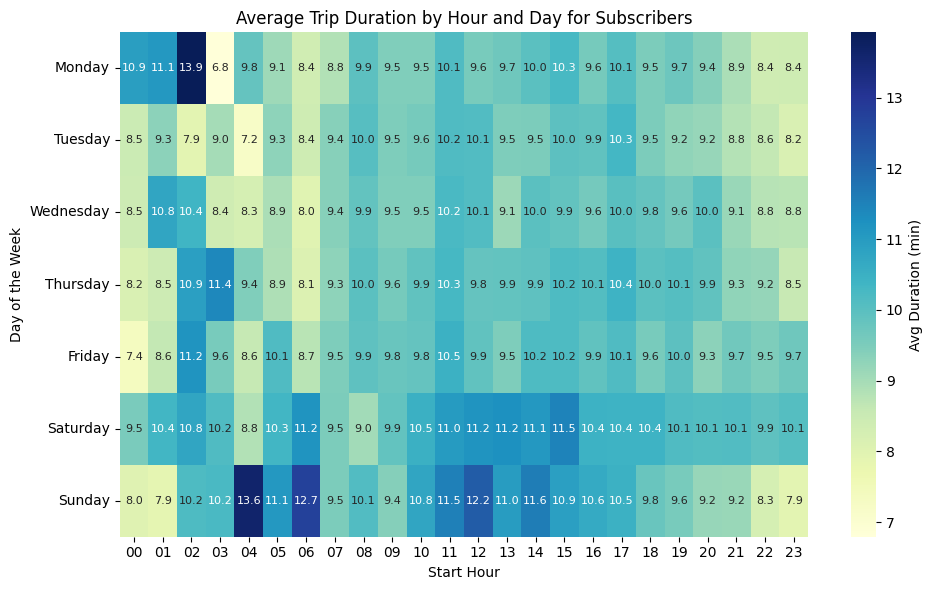

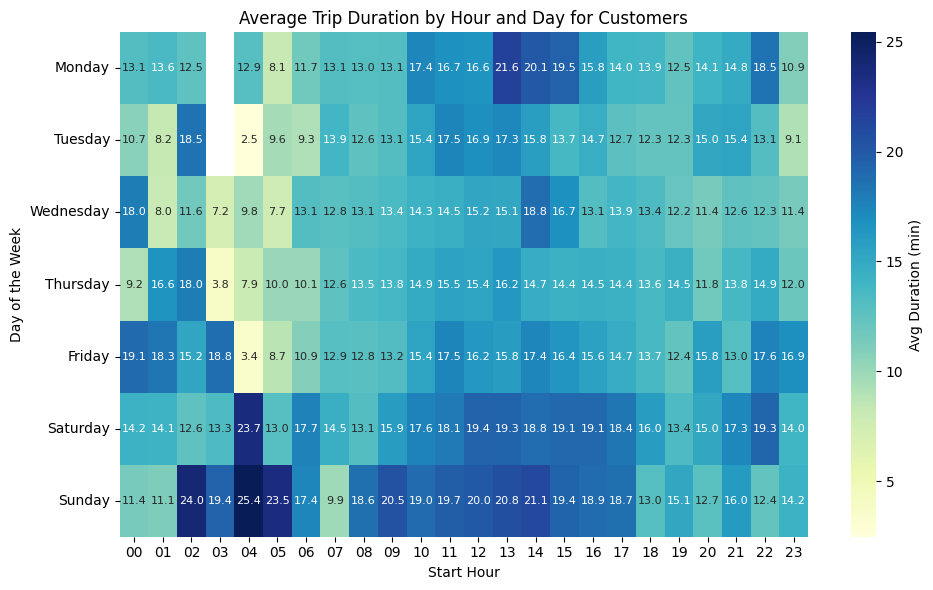

In [25]:
# Create pivot tables for Subscribers and Customers
subscriber_pivot = clean_df[clean_df['user_type'] == 'Subscriber'].pivot_table(index='start_day', columns='start_hour', values='duration_min', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
customer_pivot = clean_df[clean_df['user_type'] == 'Customer'].pivot_table(index='start_day', columns='start_hour', values='duration_min', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the heatmap for Subscribers
plt.figure(figsize=(10, 6))  
sns.heatmap(subscriber_pivot, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Avg Duration (min)'}, annot_kws={"size": 8})  # Reduced font size
plt.title("Average Trip Duration by Hour and Day for Subscribers")
plt.xlabel("Start Hour")
plt.ylabel("Day of the Week")  
plt.tight_layout()  
plt.show()

# Plotting the heatmap for Customers
plt.figure(figsize=(10, 6))
sns.heatmap(customer_pivot, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Avg Duration (min)'}, annot_kws={"size": 8})
plt.title("Average Trip Duration by Hour and Day for Customers")
plt.xlabel("Start Hour")
plt.ylabel("Day of the Week")
plt.tight_layout() 
plt.show()


The heatmaps provide a detailed visualization of how average trip duration varies by hour of the day and day of the week for Subscribers and Customers.
* Both Subscribers and Customers exhibit similar weekday patterns, with longer trips during peak commuting hours (morning and evening) and shorter trips during the midday hours.
* The weekend patterns differ significantly between the two groups. Subscribers tend to have shorter trips on weekends. In contrast, Customers have longer trip durations on weekends, particularly on Saturdays.
* Both groups experience a dip in average trip duration around the middle of the week, possibly due to reduced demand or shorter trips during this period.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> One of the most interesting relationships observed is the interplay between user type, day of the week, and hour of the day.
> * Subscribers show a strong correlation between weekday peak hours and shorter trip durations, likely indicating work-related commutes, with a significant drop in usage and shorter trips on weekends, hinting at occasional recreational use. In contrast, Customers exhibit more variability in trip durations across days and hours, with longer trips especially on weekends, suggesting their usage is more recreational or leisure-oriented.
> * The user type significantly influences trip duration patterns. Subscribers, with their consistent usage and shorter trip durations, likely represent a more commuter-oriented demographic. Customers, on the other hand, exhibit a more diverse range of usage patterns.
> * The time of day strongly impacts trip duration for both user types. Peak hours, particularly morning and evening, are associated with longer trips, while off-peak hours tend to have shorter trips.
> * Weekday usage patterns differ from weekend patterns. Weekdays are characterized by longer trips, especially during peak hours, while weekends exhibit shorter and more variable trip durations.
### Were there any interesting or surprising interactions between features?
> * User Type and Trip Duration:While it was expected that Subscribers would generally have shorter, more consistent trips due to commuting, the data revealed that they often took significantly longer trips during peak hours (morning and evening). This was surprising because it suggested that Subscribers might be using the service not only for commuting but also for longer errands or activities during rush hours.
> * Gender and Trip Duration:Female users showed shorter average trip durations compared to male users during weekdays.
> * Customer Trip Durations: While customers generally take shorter trips, the heatmaps reveal that some customers have surprisingly long trips, even during off-peak hours. This could be due to various factors, such as longer recreational rides or unusual circumstances.
> * Weekend Subscriber Behavior: Subscribers, typically associated with commuting, show a surprising shift towards shorter and more varied trip durations on weekends. This suggests that a significant portion of subscribers use the bike-sharing service for leisure activities on weekends.

## Conclusions
> * Subscribers tend to use the bike-sharing service primarily for commuting, which is reflected in their longer trip durations during peak hours. In contrast, Customers exhibit more variability in their trip patterns, indicating recreational or spontaneous use, particularly during weekends.
> * Time of day plays a crucial role in influencing trip durations. The analysis revealed that trip durations generally increase during the late afternoon and evening hours, particularly on weekdays.
> * The analysis uncovered interesting gender dynamics, with female users generally taking shorter trips than male users.
> * Weekend usage showed a significant increase in trip durations for Customers
> * The interactions among user type, trip duration, start hour, and day of the week revealed nuanced insights. For example, the combination of gender and user type provided a deeper understanding of how different demographics engage with the service. The differences in trip patterns on specific days underscore the importance of tailoring service offerings to meet user needs.